In [1]:
"""Code writtent by Cyprien Dautrevaux
PhD Student, Institut de Neurosciences des Systèmes
"""

'Code writtent by Cyprien Dautrevaux\nPhD Student, Institut de Neurosciences des Systèmes\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

import os 
cwd = os.getcwd()
os.environ['DISPLAY'] = ':0'

# -- Neuron initialization --
from neuron import h, gui
from neuron.units import ms, mV, µm
h.nrn_load_dll(os.path.join(cwd,"Mechanism", "arm64", ".libs/libnrnmech.so"))


# -- To translate the Neuron model into swc file
# from hoc2swc import neuron2swc
# neuron2swc("out.swc")

1.0

In [3]:
# Neuronal model importation
from Average_WT_ABD_nABD_Cell import Average_ABD_nABD_WT_Cell_model
from Features_extraction import features_extractor

Initializing the Neuron
----------------------------------------------------------------------
All segments are defined
Segment connectivity check:
Connected segment: 19/19
✅ All segment are connected!
Set biophysics
Neuron ready to be used ^_^
----------------------------------------------------------------------


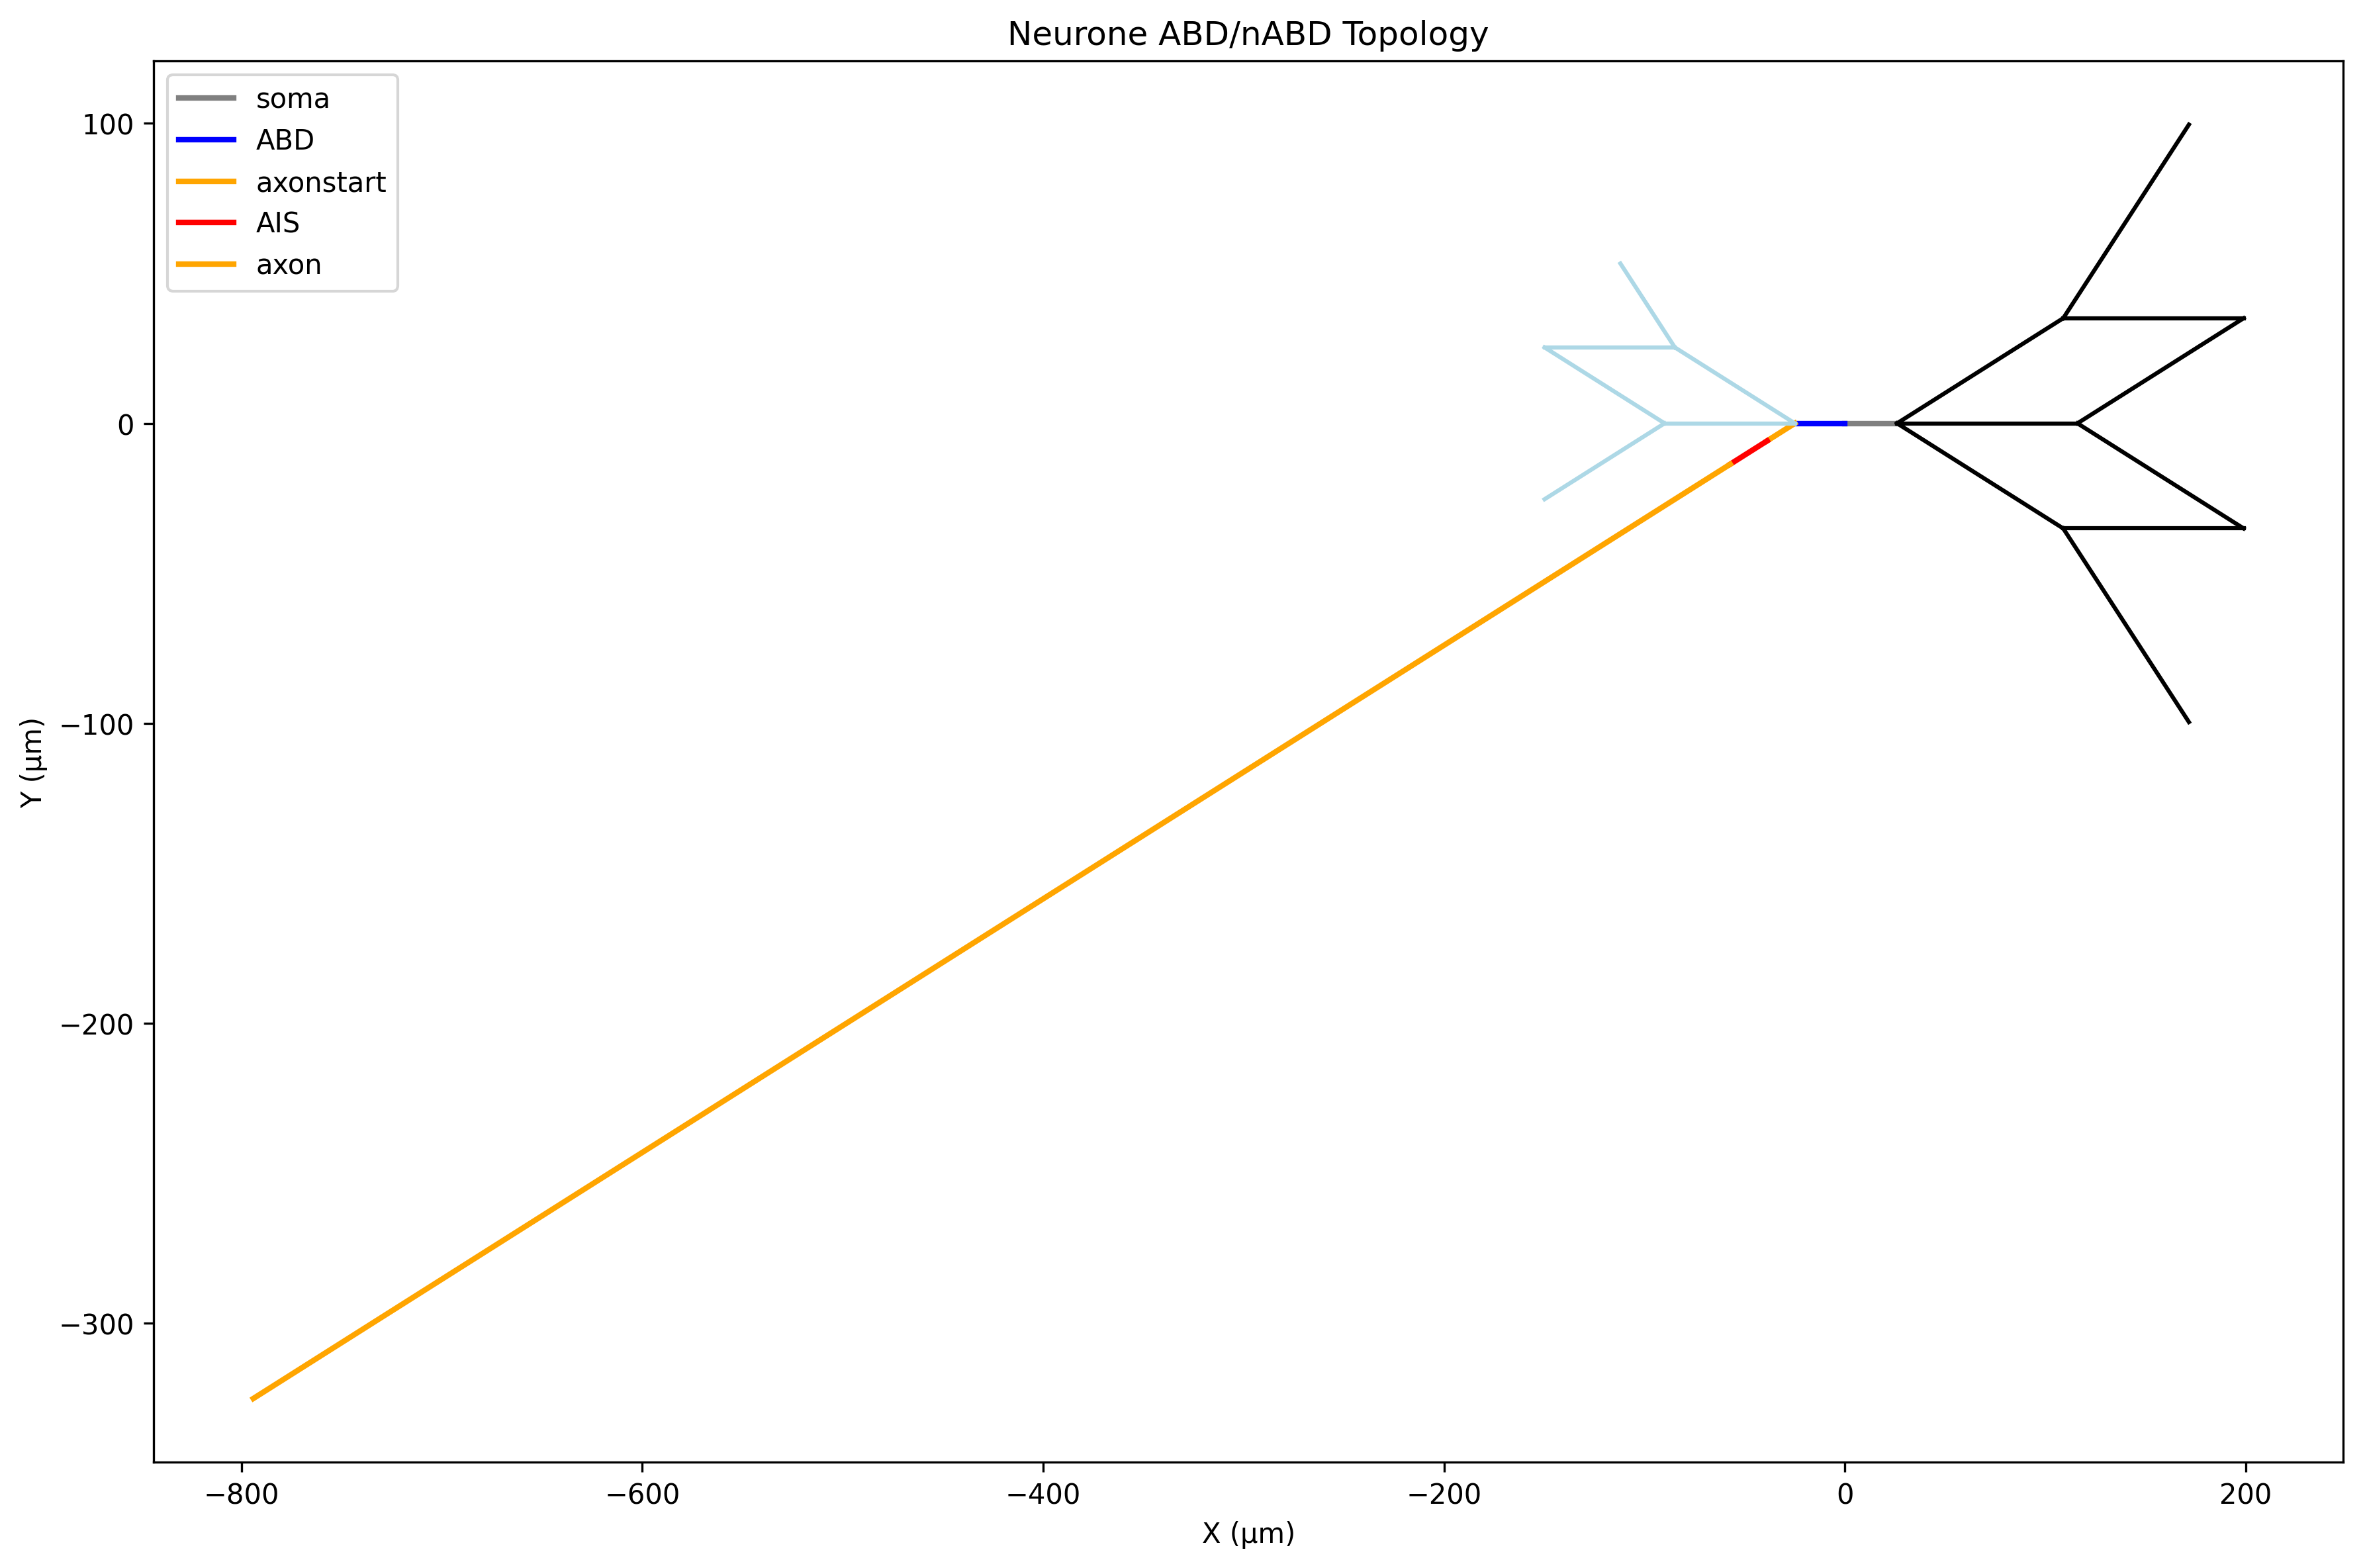

In [4]:
# Create the first Neuron
model_Cell = Average_ABD_nABD_WT_Cell_model(gid=0)

# Accéder aux sections
soma = model_Cell.soma
ABD = model_Cell.ABD
nABD = model_Cell.nABD
model_Cell.plot_morphology("2D")

# model_Cell.soma(0.8).volume() # to check

In [5]:
# -- Recording vector --
soma_vec = h.Vector()  # Membrane potential vector
time_vec = h.Vector()  # Time stamp vector

nABD_vec = h.Vector()
AIS_vec = h.Vector()

soma_vec.record(soma(0.5)._ref_v)
time_vec.record(h._ref_t)
nABD_vec.record(model_Cell.nABD[1](0.5)._ref_v)
AIS_vec.record(model_Cell.AIS(0.5)._ref_v)

# Spike time implemented in Neuron
spike_indx = h.Vector()
netcon = h.NetCon(soma(0.5)._ref_v, None)
netcon.threshold = -30.0
netcon.record(spike_indx)

# -- Recording settings --
h.tstop = 8000
h.dt = 0.02
h.celsius = 35
h.v_init = -70
h.steps_per_ms = 20
h.run()

Changed dt


0.0

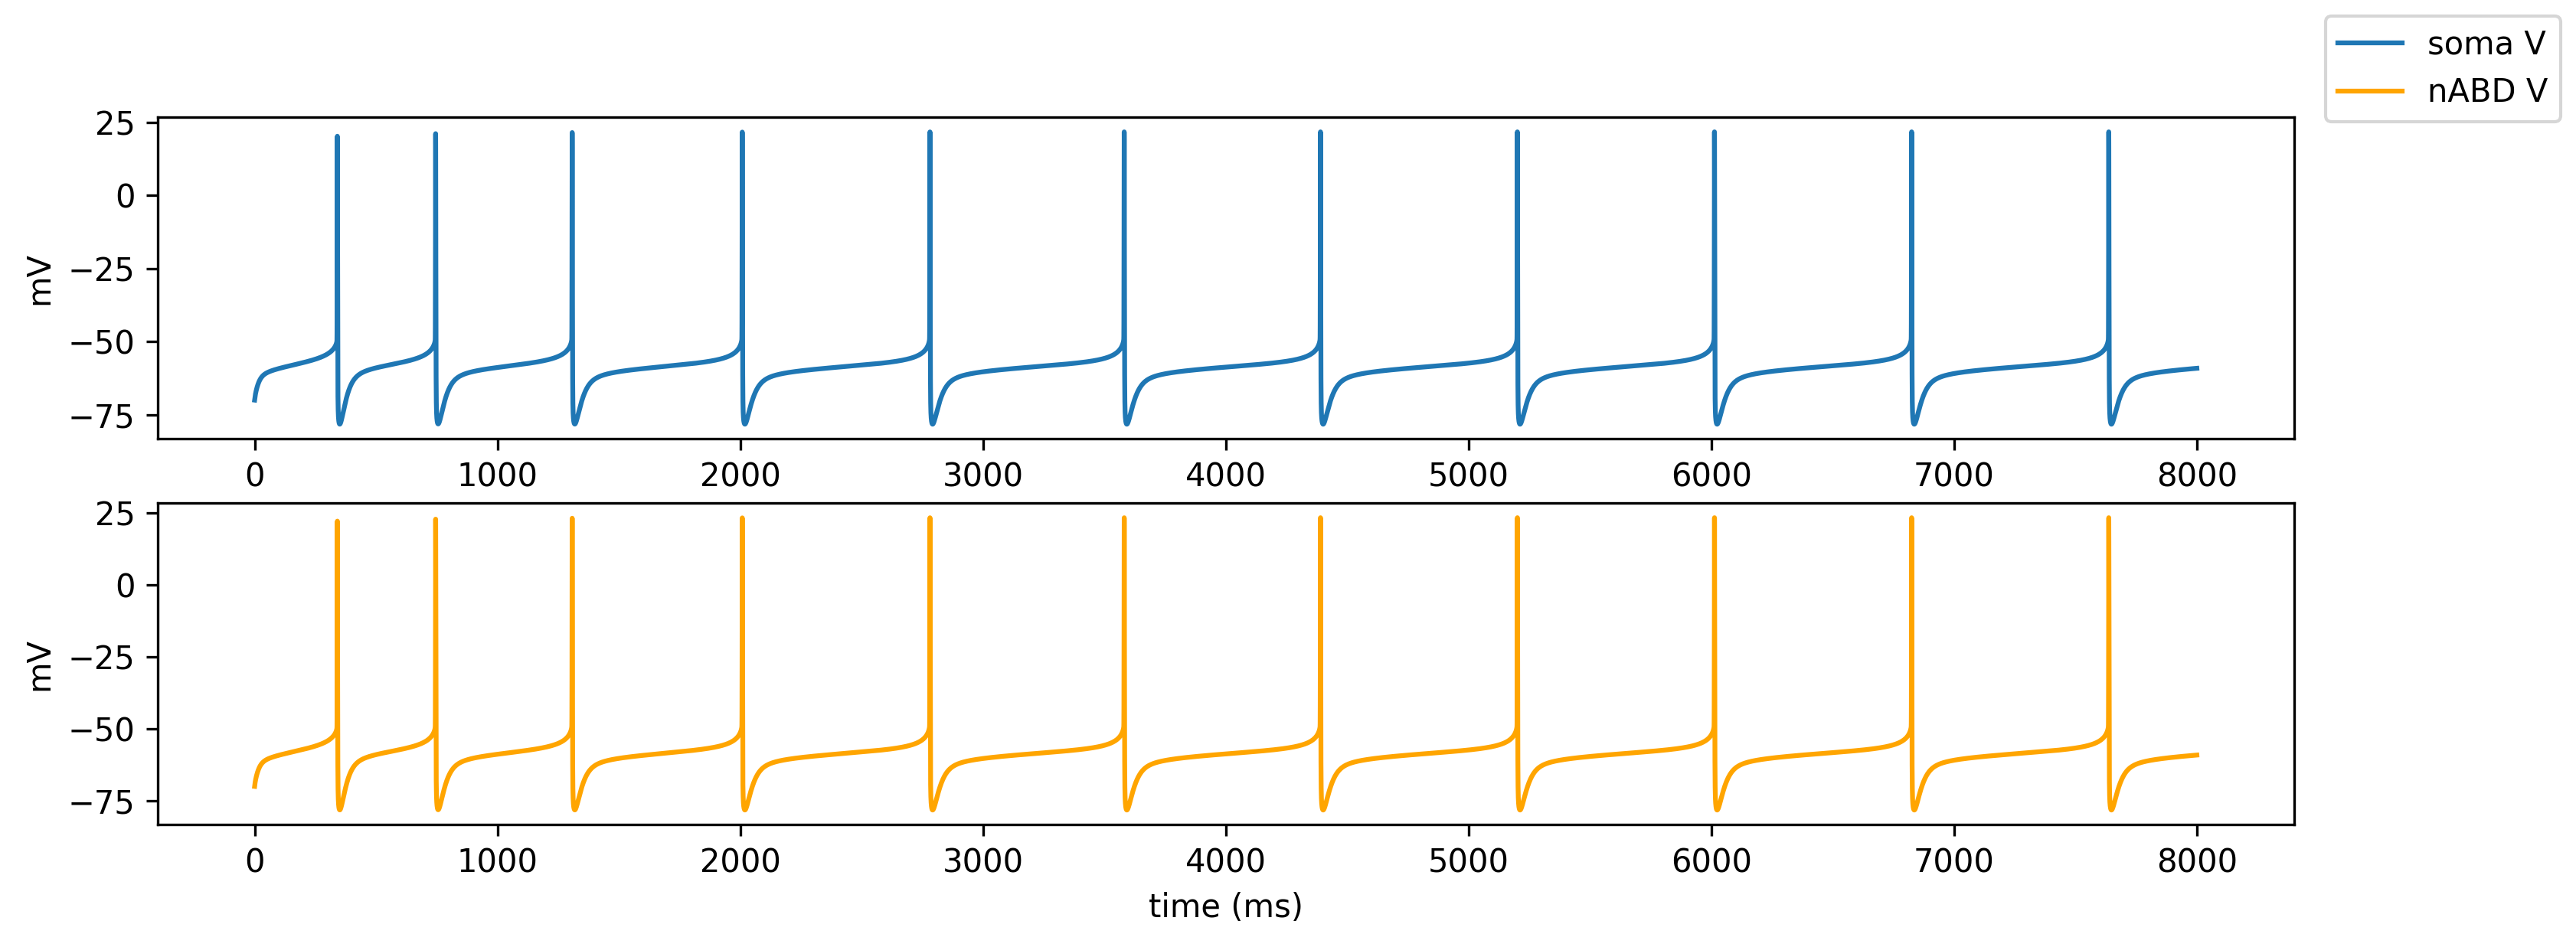

In [7]:
fig, ax = plt.subplots(2,1,figsize=(12,4), dpi=300)
ax[0].plot(time_vec, soma_vec, label="soma V")
ax[0].set_xlabel('time (ms)')
ax[0].set_ylabel('mV')
ax[1].plot(time_vec, nABD_vec, label="nABD V", color="orange")
ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('mV')

fig.legend()
plt.show()

Features extraction ready to be computed \^o^/


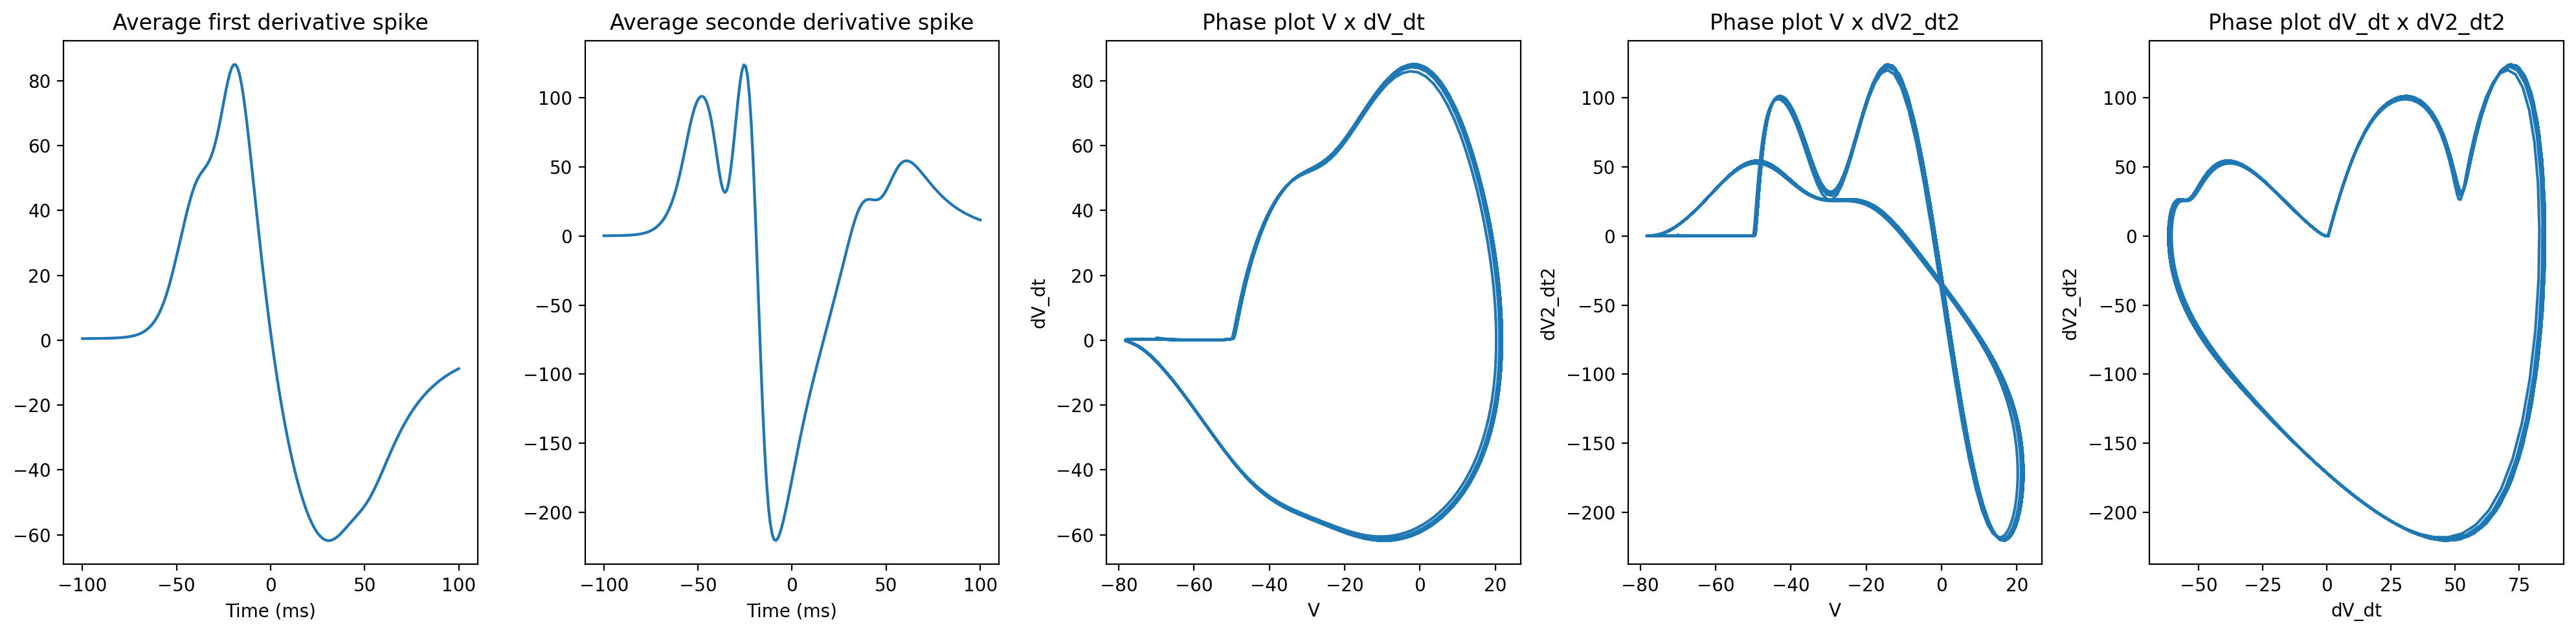

In [8]:
# Soma recording features extraction 

Extractor_soma = features_extractor()
_ = Extractor_soma.Windowed_derivative_plot(V_vec=soma_vec, T_vec=time_vec, plot_show=True)


All_stats = Extractor_soma.Compute_summary_stats(V_vec=soma_vec, T_vec=time_vec)
All_features_labels = Extractor_soma.Features_names()

Features extraction ready to be computed \^o^/


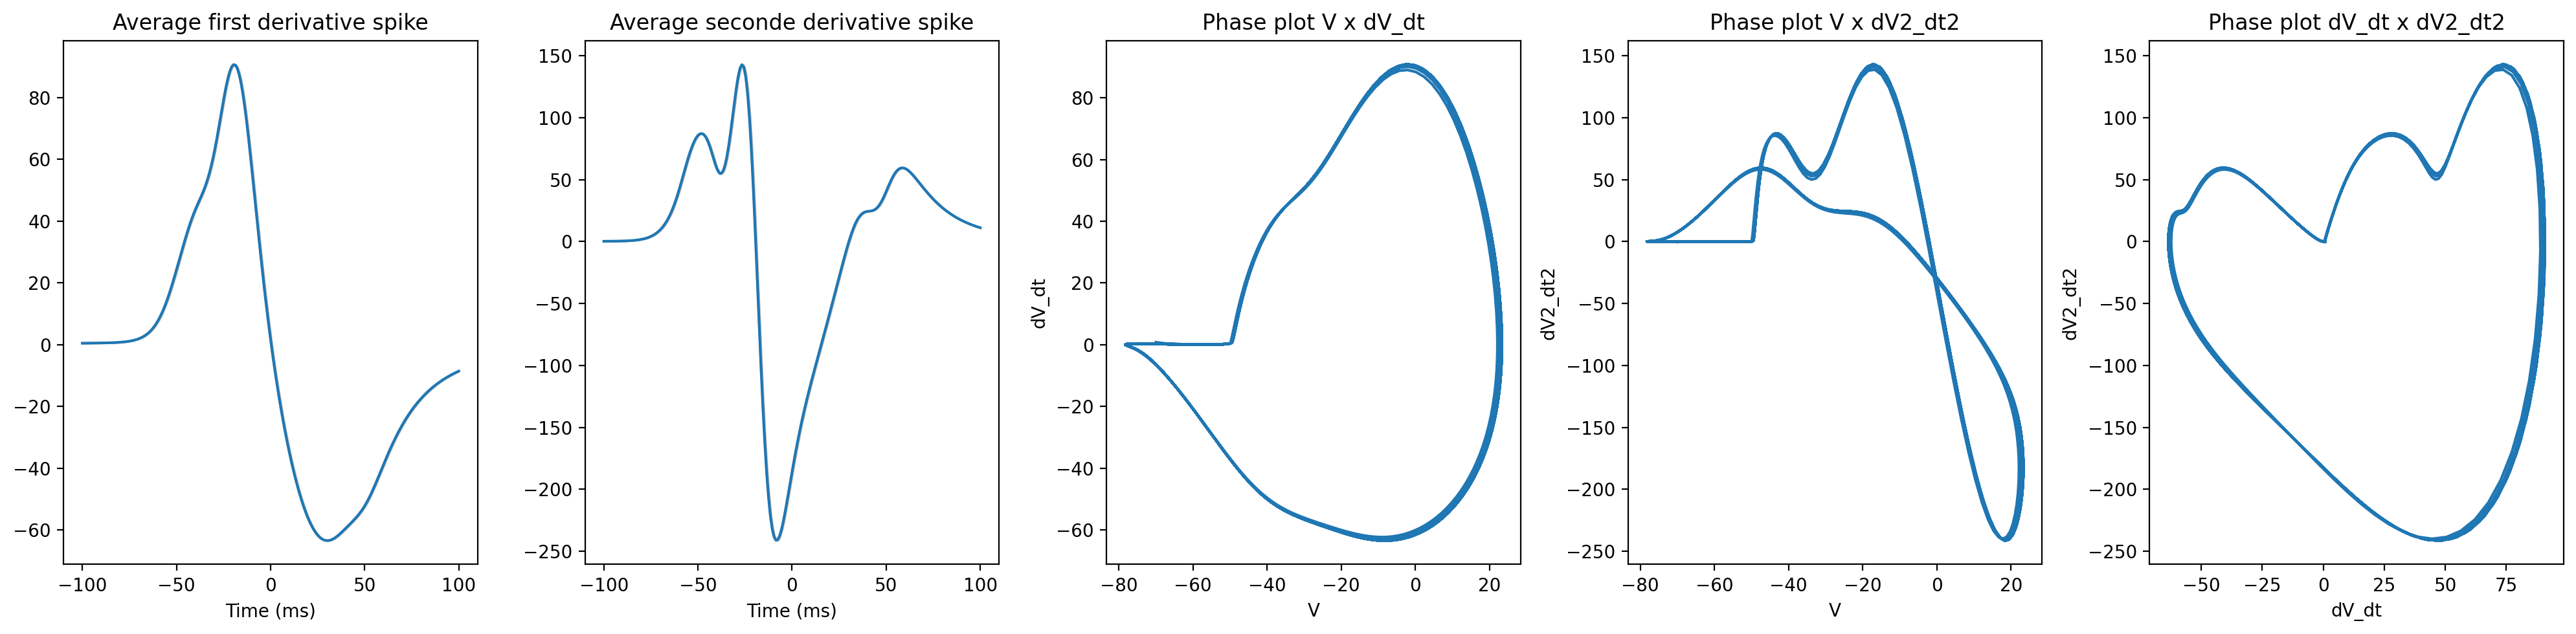

In [9]:
# nABD recording features extraction 

Extractor_nABD = features_extractor()
_ = Extractor_nABD.Windowed_derivative_plot(V_vec=nABD_vec, T_vec=time_vec, plot_show=True)

Features extraction ready to be computed \^o^/


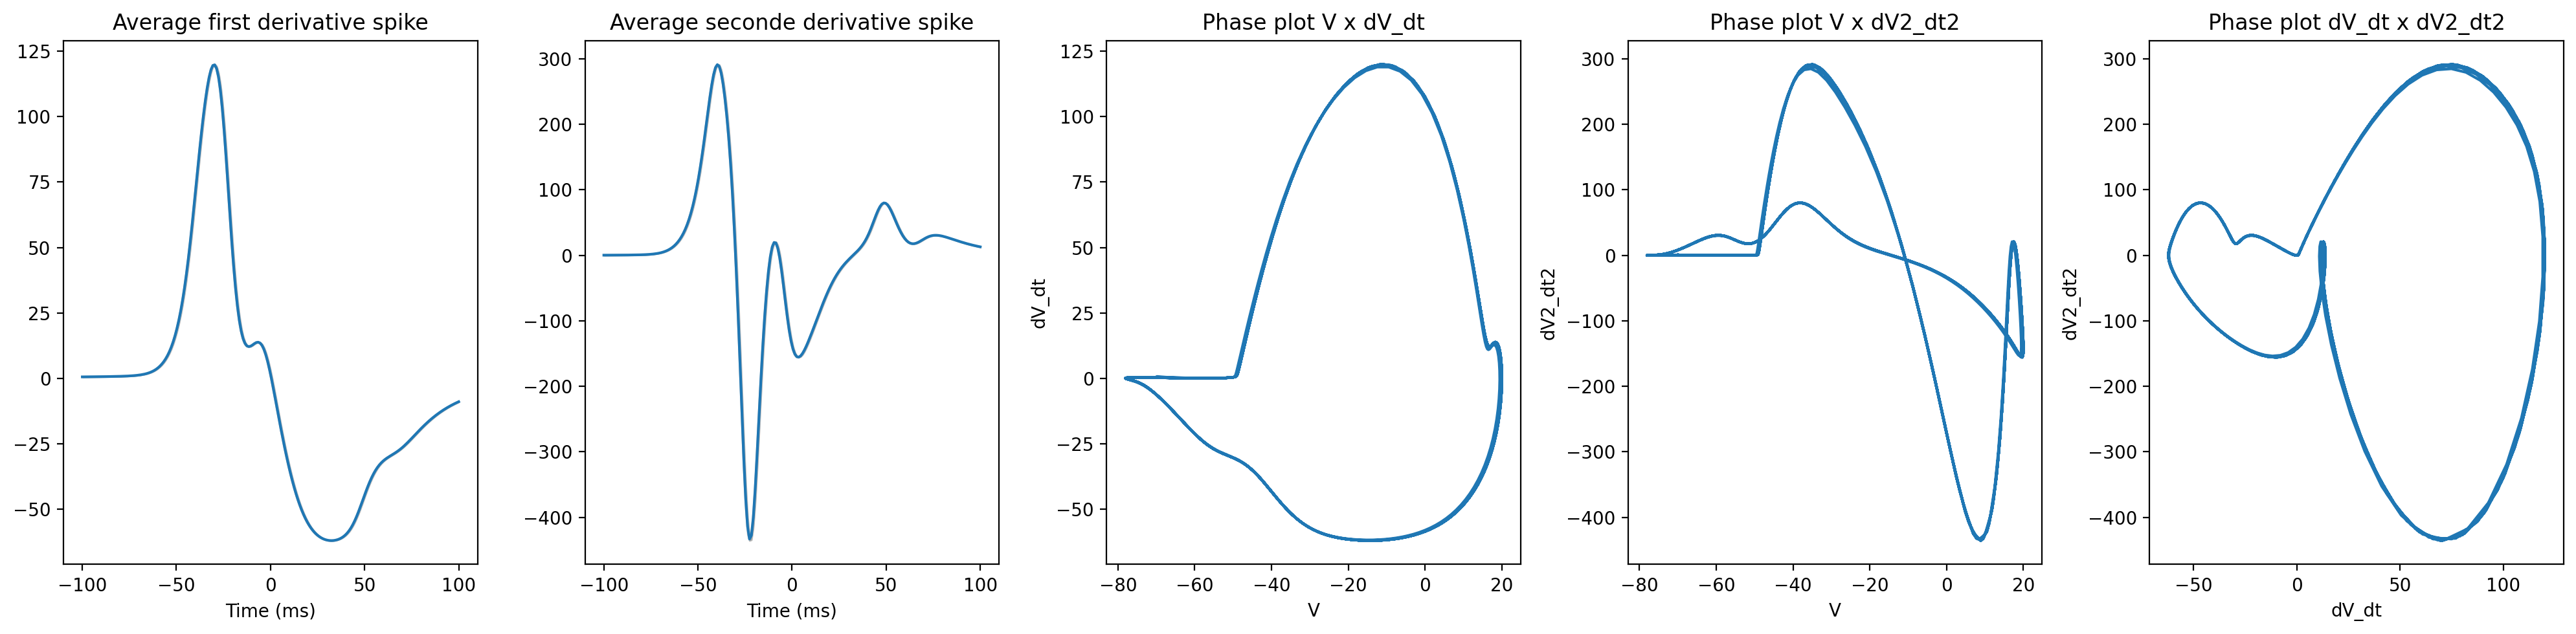

In [10]:
# AIS recording features extraction 

Extractor_AIS = features_extractor()
_ = Extractor_AIS.Windowed_derivative_plot(V_vec=AIS_vec, T_vec=time_vec, plot_show=True)

In [11]:
print(" ----- All features extracted ----- \n")
for i in range(len(All_features_labels)):
    print(f"{All_features_labels[i]} = {All_stats[i]}")


 ----- All features extracted ----- 

Spike_freq = 1.2329088017538767
Average_ISI = 0.8110899999881971
Std_ISI = 0.0013459754826692966
Sem_ISI = 0.0006729877413346483
Skew_ISI = -1.2502322783416053
CV_ISI = 0.0016594650195278983
Average_spike_onset = -47.588735438038064
Average_spike_max_potential = 21.74339654622052
Spike_amplitude = 69.33213198425858
Average_Half_width = 1.4124999999794454
Average_Onset_slope_potential = 35.729858158005925
Average_Offset_slope_potential = -54.98288526458095
Average_Onset_slope_duration = 0.8291666666546007
Average_Offset_slope_duration = 1.5666666666438687
Average_Max_rise = 85.01142257017194
Average_max_decay = -61.78709166011013
Average_AHP_trough = -68.21306618531179
Average_AHP_latency = 3.9166666666096717
nAverage_IS_peak = 101.30544251123717
Average_SD_peak = 124.15430905962944
IS_SD_latency = -0.5499999999919964


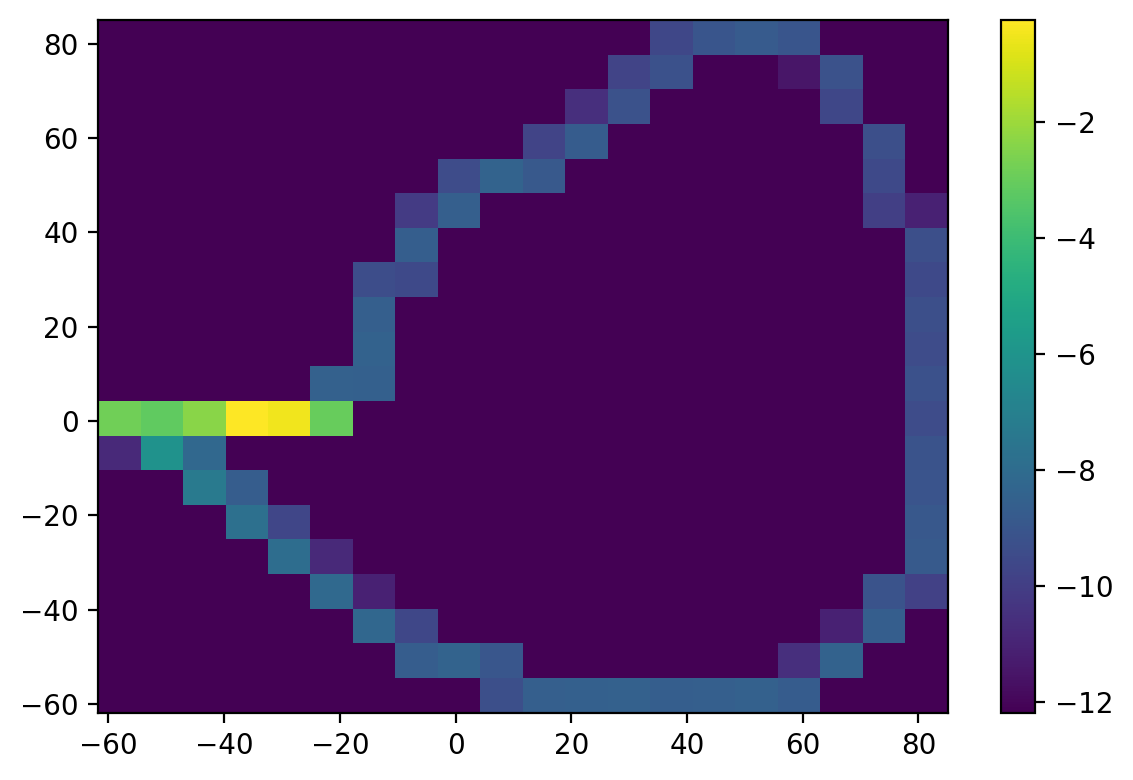

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
bins = 20

manifold, xedges, yedges = np.histogram2d(soma_vec, Extractor_soma.dv_dt, bins=bins)
manifold[np.where(manifold<= 0)] = 1 

# --- Figure ---
xaxis_range = np.linspace(Extractor_soma.dv_dt.min(), Extractor_soma.dv_dt.max(), bins+1)
mat = ax.pcolormesh(xaxis_range, yedges, np.log(manifold.T / np.linalg.norm(manifold.T, keepdims=True)))
fig.colorbar(mat, ax=ax)
plt.tight_layout()
plt.show()

# Cell Current Clamp hyperpolarising current 

In [13]:
model_Cell_hyp = Average_ABD_nABD_WT_Cell_model(gid=1)

# Accéder aux sections
soma_hyp = model_Cell_hyp.soma
# model_Cell_hyp.plot_morphology("2D")

# model_Cell.soma(0.8).volume() # to check

# -- Recording vector --
soma_vec_hyp = h.Vector()  # Membrane potential vector
time_vec_hyp = h.Vector()  # Time stamp vector


soma_vec_hyp.record(soma_hyp(0.5)._ref_v)
time_vec_hyp.record(h._ref_t)

# Defining a stimulation
# Application of current on the Soma 
stim = h.IClamp(model_Cell_hyp.soma(0.5))
# stim.get_segment() # List the stimulated segment

# Stim parameters 
stim.delay = 2000
stim.dur = 300
stim.amp = -0.25

# -- Recording settings --
h.tstop = 8000
h.dt = 0.02
h.celsius = 35
h.v_init = -70
h.steps_per_ms = 20
h.run()

Initializing the Neuron
----------------------------------------------------------------------
All segments are defined
Segment connectivity check:
Connected segment: 19/19
✅ All segment are connected!
Set biophysics
Neuron ready to be used ^_^
----------------------------------------------------------------------
Changed dt


0.0

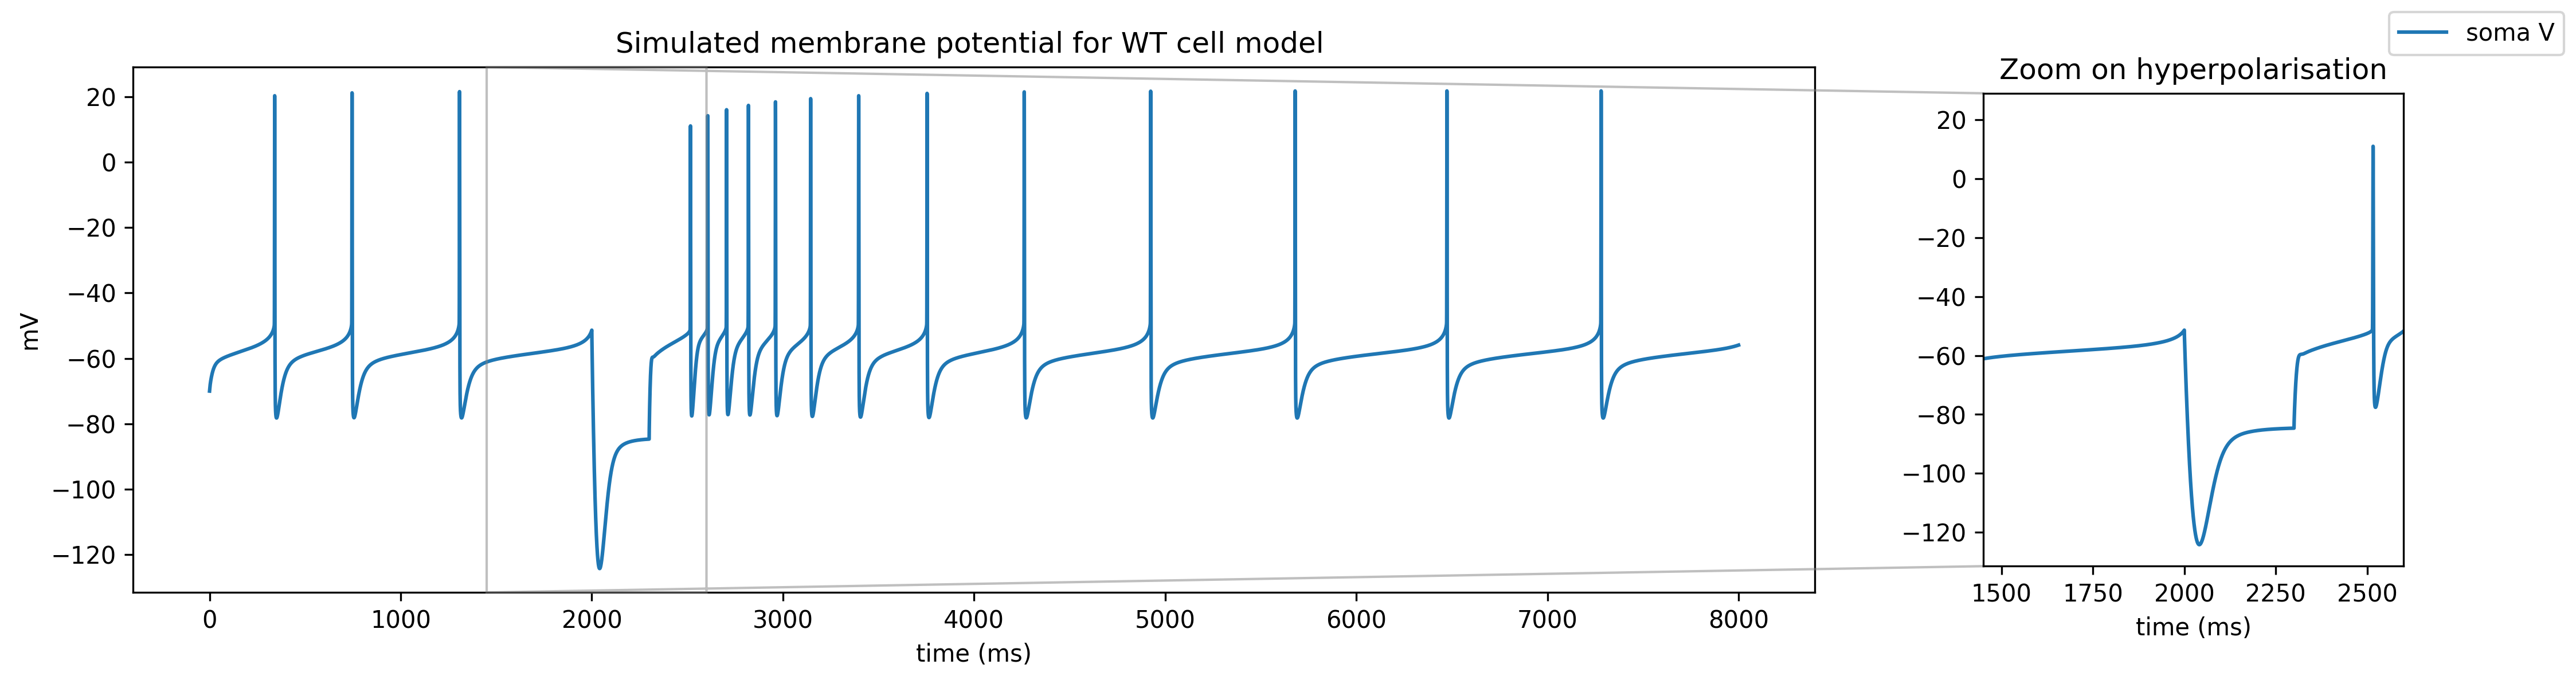

In [14]:
fig, ax = plt.subplots(figsize = (15,4), dpi=300)
ax.plot(time_vec_hyp, soma_vec_hyp, label="soma V")
ax.set_xlabel('time (ms)')
ax.set_ylabel('mV')
ax.set_title("Simulated membrane potential for WT cell model ")

axin = ax.inset_axes(bounds=(1.1,0.05,0.25,0.9))
axin.plot(time_vec_hyp, soma_vec_hyp)
axin.set_title("Zoom on hyperpolarisation")
axin.set_xlim(1450, 2600)
axin.set_xlabel('time (ms)')
ax.indicate_inset_zoom(axin)
fig.legend()
plt.tight_layout()
plt.show()

In [15]:
Extractor_soma_hyperpol = features_extractor()
_ = Extractor_soma_hyperpol.Compute_summary_stats(V_vec=soma_vec_hyp, T_vec=time_vec_hyp)
SAG_features = Extractor_soma_hyperpol.SAG_analysis(start_stim=int(stim.delay), end_stim=int((stim.delay + stim.dur)), dt=h.dt)
SAG_features_labels = Extractor_soma_hyperpol.SAG_features_labels()

for i in range(len(SAG_features_labels)):
    print(f"{SAG_features_labels[i]}: {SAG_features[i]}")

Features extraction ready to be computed \^o^/
Min_potential_SAG: -124.24040798564252
SAG_plateau_potential: -84.67522922928879
SAG_amplitude: 39.56517875635373
Delay_first_spike_after_hyperpol: 216.2999999984445


# Depolarisation 100pA stimulation 

In [16]:
model_Cell_depol = Average_ABD_nABD_WT_Cell_model(gid=2)

# Accéder aux sections
soma_depol = model_Cell_depol.soma
# model_Cell_hyp.plot_morphology("2D")

# model_Cell.soma(0.8).volume() # to check

# -- Recording vector --
soma_vec_depol = h.Vector()  # Membrane potential vector
time_vec_depol = h.Vector()  # Time stamp vector


soma_vec_depol.record(soma_depol(0.5)._ref_v)
time_vec_depol.record(h._ref_t)

# Defining a stimulation
# Application of current on the Soma 
stim_depol = h.IClamp(model_Cell_depol.soma(0.5))
# stim.get_segment() # List the stimulated segment

# Stim parameters 
stim_depol.delay = 2000
stim_depol.dur = 2000
stim_depol.amp = 0.100

# -- Recording settings --
h.tstop = 8000
h.dt = 0.02
h.celsius = 35
h.v_init = -70
h.steps_per_ms = 20
h.run()

Initializing the Neuron
----------------------------------------------------------------------
All segments are defined
Segment connectivity check:
Connected segment: 19/19
✅ All segment are connected!
Set biophysics
Neuron ready to be used ^_^
----------------------------------------------------------------------
Changed dt


0.0

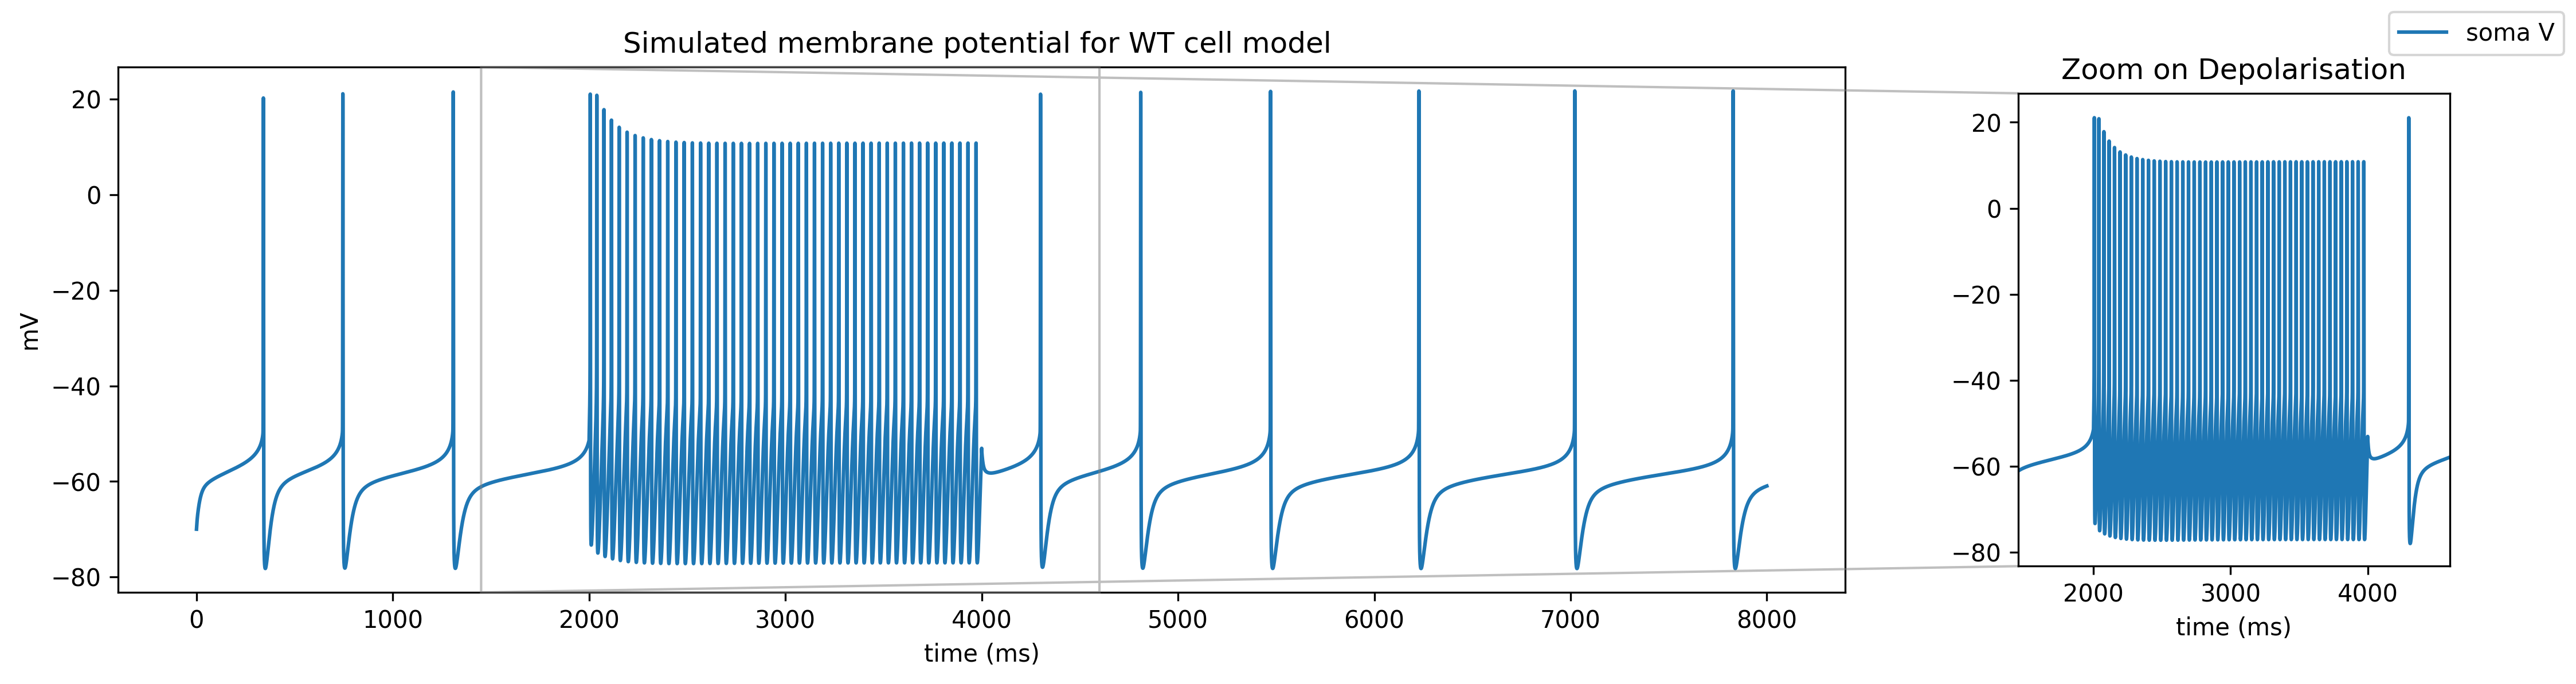

In [17]:
fig, ax = plt.subplots(figsize = (15,4), dpi=300)
ax.plot(time_vec_depol, soma_vec_depol, label="soma V")
ax.set_xlabel('time (ms)')
ax.set_ylabel('mV')
ax.set_title("Simulated membrane potential for WT cell model ")

axin = ax.inset_axes(bounds=(1.1,0.05,0.25,0.9))
axin.plot(time_vec_depol, soma_vec_depol)
axin.set_title("Zoom on Depolarisation")
axin.set_xlim(1450, 4600)
axin.set_xlabel('time (ms)')
ax.indicate_inset_zoom(axin)
fig.legend()
plt.tight_layout()
plt.show()

In [18]:
Extractor_soma_depol = features_extractor()
_ = Extractor_soma_depol.Compute_summary_stats(V_vec=soma_vec_depol, T_vec=time_vec_depol)
Depol_features = Extractor_soma_depol.excitability(start_stim=int(stim_depol.delay), end_stim=int((stim_depol.delay + stim_depol.dur)), dt=h.dt)

Depol_features_label = Extractor_soma_hyperpol.excitability_features_labels()

for i in range(len(Depol_features_label)):
    print(f"{Depol_features_label[i]}: {Depol_features[i]}")

Features extraction ready to be computed \^o^/
start_freq: 27.790643816789363
end_freq: 24.31610942284625
